## 1. Instalando o Apache Spark
O que é: Um framework para processamento de Big Data


In [ ]:
# Instalando o PySpark
!apt-get -qq update
!apt-get -qq install -y openjdk-17-jdk-headless
!pip -q install -U pyspark[connect]==4.0.0

print('✅ PySpark instalado com sucesso!')
#Depois de concluir a instalação, reiniciar o runtime

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
(Reading database ... 117540 files and directories currently installed.)
Preparing to unpack .../openjdk-17-jdk-headless_17.0.18+8-1~22.04.1_amd64.deb ...
Unpacking openjdk-17-jdk-headless:amd64 (17.0.18+8-1~22.04.1) over (17.0.17+10-1~22.04) ...
Preparing to unpack .../openjdk-17-jre-headless_17.0.18+8-1~22.04.1_amd64.deb ...
Unpacking openjdk-17-jre-headless:amd64 (17.0.18+8-1~22.04.1) over (17.0.17+10-1~22.04) ...
Setting up openjdk-17-jre-headless:amd64 (17.0.18+8-1~22.04.1) ...
Installing new version of config file /etc/java-17-openjdk/jfr/default.jfc ...
Installing new version of config file /etc/java-17-openjdk/security/java.security ...
Setting up openjdk-17-jdk-headless:amd64 (17.0.18+8-1~22.04.1) ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.1/434.1 MB 3.0 MB/s eta 0:00:00
  Preparin

# 2. Criando uma SparkSession

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

# Criando uma SparkSession
spark = SparkSession.builder \
    .master('local[*]') \
    .appName('AnaliseECommerce') \
    .getOrCreate()

print('✅ SparkSession criada com sucesso!')

✅ SparkSession criada com sucesso!


Dados <-- Streamin ou consulta -- PySpark --> SparkServer

# 3. Carregando dados do Google Drive

In [ ]:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Caminho dos datasets
DATA_PATH = '/content/drive/MyDrive/curso_hadoop/'

# Carregar os datasets
df_clientes = spark.read.csv(DATA_PATH + 'clientes.csv', header=True, inferSchema=True)
df_produtos = spark.read.csv(DATA_PATH + 'produtos.csv', header=True, inferSchema=True)
df_vendas = spark.read.csv(DATA_PATH + 'vendas.csv', header=True, inferSchema=True)

print('✅ Datasets carregados com sucesso!')

Mounted at /content/drive
✅ Datasets carregados com sucesso!


# 4. Explorando os DataFrames

In [ ]:
# Visualizar schema do Dataframe (Schema = estrutura)
print('Schema do DataFrame de Vendas:')
df_vendas.printSchema()

Schema do DataFrame de Vendas:
root
 |-- venda_id: integer (nullable = true)
 |-- data_venda: timestamp (nullable = true)
 |-- cliente_id: integer (nullable = true)
 |-- produto_id: integer (nullable = true)
 |-- quantidade: integer (nullable = true)
 |-- preco_total: double (nullable = true)



In [ ]:
# Visualizar as primeiras 5 linhas do dataframe de vendas
df_vendas.show(5)

+--------+-------------------+----------+----------+----------+-----------+
|venda_id|         data_venda|cliente_id|produto_id|quantidade|preco_total|
+--------+-------------------+----------+----------+----------+-----------+
|   50001|2023-02-27 03:22:00|      1772|       203|         2|      237.1|
|   50002|2023-12-19 21:15:00|      1478|       207|         4|     2581.4|
|   50003|2023-02-03 08:10:00|      1385|       111|         3|      42.33|
|   50004|2023-10-31 11:53:00|      1700|       165|         5|     765.15|
|   50005|2023-07-10 20:04:00|      1778|       173|         5|    2852.15|
+--------+-------------------+----------+----------+----------+-----------+
only showing top 5 rows


In [ ]:
# Contando registros de um dataframe
print(f'Total de vendas:{df_vendas.count()}')
print(f'Total de clientes:{df_clientes.count()}')
print(f'Total de produtos:{df_produtos.count()}')

Total de vendas:10000
Total de clientes:500
Total de produtos:200


# 5. Operações com DataFrame

In [ ]:
# Selecionar dados de venda, cliente e preço
df_venda_simples = df_vendas.select('venda_id', 'cliente_id', 'preco_total')
df_venda_simples.show(5)

+--------+----------+-----------+
|venda_id|cliente_id|preco_total|
+--------+----------+-----------+
|   50001|      1772|      237.1|
|   50002|      1478|     2581.4|
|   50003|      1385|      42.33|
|   50004|      1700|     765.15|
|   50005|      1778|    2852.15|
+--------+----------+-----------+
only showing top 5 rows


In [ ]:
# Filtrar linhas por valor, exemplo, vendas maiores que 2000
vendas_altas = df_vendas.filter(col('preco_total') > 2000)
print(f'Total de vendas maior que 2000,00: {vendas_altas.count()}')
vendas_altas.show(5)

Total de vendas maior que 2000,00: 2741
+--------+-------------------+----------+----------+----------+-----------+
|venda_id|         data_venda|cliente_id|produto_id|quantidade|preco_total|
+--------+-------------------+----------+----------+----------+-----------+
|   50002|2023-12-19 21:15:00|      1478|       207|         4|     2581.4|
|   50005|2023-07-10 20:04:00|      1778|       173|         5|    2852.15|
|   50008|2023-04-28 15:22:00|      1351|       246|         5|     4138.8|
|   50012|2023-03-02 03:00:00|      1052|       154|         3|    2711.46|
|   50018|2023-02-26 07:40:00|      1191|       251|         5|    4104.95|
+--------+-------------------+----------+----------+----------+-----------+
only showing top 5 rows


In [ ]:
# Agrupar vendas por cliente (somando o valor das vendas)
vendas_por_cliente = df_vendas.groupBy('cliente_id').agg(
    count('venda_id').alias('total_vendas'),
    sum('preco_total').alias('total_gasto')
)
vendas_por_cliente.show(5)

+----------+------------+------------------+
|cliente_id|total_vendas|       total_gasto|
+----------+------------+------------------+
|      1591|          18|          20506.09|
|      1645|          26|37171.020000000004|
|      1580|          23|31396.199999999997|
|      1088|          16|          22947.97|
|      1829|          24|27914.079999999998|
+----------+------------+------------------+
only showing top 5 rows


In [ ]:
# Join entre dataframes (vendas e clientes)

df_vendas_clientes = df_vendas.join(
    df_clientes, 'cliente_id')
print('Vendas com informações de clientes:')
df_vendas_clientes.select('cliente_id', 'nome', 'preco_total').show(5)


Vendas com informações de clientes:
+----------+--------------------+-----------+
|cliente_id|                nome|preco_total|
+----------+--------------------+-----------+
|      1772|      Benício Novaes|      237.1|
|      1478|      Brenda Barbosa|     2581.4|
|      1385|         Ayla Borges|      42.33|
|      1700|      Beatriz Santos|     765.15|
|      1778|Sr. João Felipe C...|    2852.15|
+----------+--------------------+-----------+
only showing top 5 rows


# 6. Spart SQL

In [ ]:
# Para usar o spark sql primeiro registre o dataframe como tabela temporária no spark
df_vendas.createOrReplaceTempView('vendas')
df_clientes.createOrReplaceTempView('clientes')
df_produtos.createOrReplaceTempView('produtos')
# Execute sua consulta SQL a partir do spark.sql
resultado = spark.sql('''
  SELECT
    c.nome,
    COUNT(v.venda_id) as num_vendas,
    SUM(v.preco_total) as total_gasto
  FROM vendas v
  JOIN clientes c ON v.cliente_id = c.cliente_id
  GROUP BY c.nome
  ORDER BY total_gasto DESC
  LIMIT 10
''')
print('Top 10 de clientes por valor gasto')
resultado.show()

Top 10 de clientes por valor gasto
+--------------------+----------+------------------+
|                nome|num_vendas|       total_gasto|
+--------------------+----------+------------------+
|  Maria Luísa Vargas|        50| 68577.37999999999|
|Luiz Fernando Fre...|        48| 66902.37000000001|
|         Vitor Souza|        32|62589.869999999995|
|         Igor Vargas|        47|          60577.36|
|        Sarah da Paz|        31| 56962.85999999998|
|     Yasmin Caldeira|        30|54820.750000000015|
|     Dra. Ísis Porto|        25|          54808.08|
|      Ana Luiza Lima|        27|51983.579999999994|
|Pedro Lucas da Cunha|        29| 51885.69999999999|
|           Ian Cunha|        26|51515.950000000004|
+--------------------+----------+------------------+



**Exercícios**:
1. Análise de vendas por categoria e produto via Spark SQL e via Dataframe
2. Análise dos clientes que mais compraram via Spark SQL e via Dataframe
3. Aplicar os mesmos conceitos em um dataset de sua

# Machine Learning com Spark
Utilizando o PySpark para  detectar possíveis atrasos de entrega.

In [ ]:
# Importar dataset olist br do Kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brazilian-ecommerce' dataset.
Path to dataset files: /kaggle/input/brazilian-ecommerce


In [ ]:
import os, glob

files = sorted(glob.glob(path + "/*.csv"))
files[:10], len(files)

(['/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv',
  '/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv',
  '/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv',
  '/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv',
  '/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv',
  '/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv',
  '/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv',
  '/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv',
  '/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv'],
 9)

In [ ]:
from pyspark.sql import functions as F

orders = spark.read.csv(path + "/olist_orders_dataset.csv", header=True, inferSchema=True)
customers = spark.read.csv(path + "/olist_customers_dataset.csv", header=True, inferSchema=True)
items = spark.read.csv(path + "/olist_order_items_dataset.csv", header=True, inferSchema=True)

print("orders:", orders.count())
print("customers:", customers.count())
print("items:", items.count())

orders.printSchema()

orders: 99441
customers: 99441
items: 112650
root
 |-- order_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- order_status: string (nullable = true)
 |-- order_purchase_timestamp: timestamp (nullable = true)
 |-- order_approved_at: timestamp (nullable = true)
 |-- order_delivered_carrier_date: timestamp (nullable = true)
 |-- order_delivered_customer_date: timestamp (nullable = true)
 |-- order_estimated_delivery_date: timestamp (nullable = true)



In [ ]:
orders2 = (
    orders
    .withColumn("purchase_ts",   F.to_timestamp("order_purchase_timestamp"))
    .withColumn("delivered_ts",  F.to_timestamp("order_delivered_customer_date"))
    .withColumn("estimated_ts",  F.to_timestamp("order_estimated_delivery_date"))
)

orders2 = orders2.filter(F.col("delivered_ts").isNotNull() & F.col("estimated_ts").isNotNull() & F.col("purchase_ts").isNotNull())

orders2 = orders2.withColumn("late", (F.col("delivered_ts") > F.col("estimated_ts")).cast("int"))


orders2.select("order_id","late","purchase_ts","delivered_ts","estimated_ts","order_status").show(5, truncate=False)

orders2.groupBy("late").count().show()


+--------------------------------+----+-------------------+-------------------+-------------------+------------+
|order_id                        |late|purchase_ts        |delivered_ts       |estimated_ts       |order_status|
+--------------------------------+----+-------------------+-------------------+-------------------+------------+
|e481f51cbdc54678b7cc49136f2d6af7|0   |2017-10-02 10:56:33|2017-10-10 21:25:13|2017-10-18 00:00:00|delivered   |
|53cdb2fc8bc7dce0b6741e2150273451|0   |2018-07-24 20:41:37|2018-08-07 15:27:45|2018-08-13 00:00:00|delivered   |
|47770eb9100c2d0c44946d9cf07ec65d|0   |2018-08-08 08:38:49|2018-08-17 18:06:29|2018-09-04 00:00:00|delivered   |
|949d5b44dbf5de918fe9c16f97b45f8a|0   |2017-11-18 19:28:06|2017-12-02 00:28:42|2017-12-15 00:00:00|delivered   |
|ad21c59c0840e6cb83a9ceb5573f8159|0   |2018-02-13 21:18:39|2018-02-16 18:17:02|2018-02-26 00:00:00|delivered   |
+--------------------------------+----+-------------------+-------------------+-----------------

In [ ]:
# Criar feature - Itens por pedido + estado do cliente + tempo estimado

items_agg = (
    items.groupBy("order_id")
    .agg(
        F.count("*").alias("n_items"),
        F.sum("price").alias("total_price"),
        F.sum("freight_value").alias("total_freight")
    )
)

In [ ]:
#Pegar estado do cliente
customers2 = customers.select("customer_id", "customer_state")


In [ ]:
# Montar a base de dados final com join

base = (
    orders2.select("order_id","customer_id","order_status","purchase_ts","delivered_ts","estimated_ts","late")
    .join(customers2, on="customer_id", how="left")
    .join(items_agg, on="order_id", how="left")
    .fillna({"n_items":0, "total_price":0.0, "total_freight":0.0})
)

base = (
    base
    .withColumn("dow", F.dayofweek("purchase_ts"))
    .withColumn("hour", F.hour("purchase_ts"))
    .withColumn("days_estimated", (F.col("estimated_ts").cast("long") - F.col("purchase_ts").cast("long"))/86400.0)
)

base.select("late","order_status","customer_state","n_items","total_price","total_freight","days_estimated").show(5, truncate=False)



+----+------------+--------------+-------+-----------+-------------+------------------+
|late|order_status|customer_state|n_items|total_price|total_freight|days_estimated    |
+----+------------+--------------+-------+-----------+-------------+------------------+
|0   |delivered   |SP            |1      |29.99      |8.72         |15.5440625        |
|0   |delivered   |BA            |1      |118.7      |22.76        |19.137766203703702|
|0   |delivered   |GO            |1      |159.9      |19.22        |26.63971064814815 |
|0   |delivered   |RN            |1      |45.0       |27.2         |26.188819444444444|
|0   |delivered   |SP            |1      |19.9       |8.72         |12.112048611111112|
+----+------------+--------------+-------+-----------+-------------+------------------+
only showing top 5 rows


In [ ]:
data = base.select(
    "late",
    "order_status",
    "customer_state",
    "n_items",
    "total_price",
    "total_freight",
    "dow",
    "hour",
    "days_estimated").na.drop()
train, test = data.randomSplit([0.8, 0.2], seed=42)

print("Train:", train.count(), " Test:", test.count())


Train: 77159  Test: 19317


In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

idx_status = StringIndexer(inputCol="order_status", outputCol="status_idx", handleInvalid="keep")
idx_state  = StringIndexer(inputCol="customer_state", outputCol="state_idx", handleInvalid="keep")

ohe = OneHotEncoder(
    inputCols=["status_idx", "state_idx"],
    outputCols=["status_ohe", "state_ohe"]
)

vec = VectorAssembler(
    inputCols=["status_ohe","state_ohe", "n_items", "total_price", "total_freight", "dow", "hour", "days_estimated"],
    outputCol="features"
)

lr = LogisticRegression(featuresCol="features", labelCol="late", maxIter=30)

pipe = Pipeline(stages=[idx_status, idx_state, ohe, vec, lr])

model = pipe.fit(train)

pred = model.transform(test)

pred.select("late", "probability", "prediction").show(5, truncate=False)


+----+-----------------------------------------+----------+
|late|probability                              |prediction|
+----+-----------------------------------------+----------+
|0   |[0.9519633114726094,0.048036688527390625]|0.0       |
|0   |[0.9866796629643688,0.01332033703563118] |0.0       |
|0   |[0.9772706981025786,0.022729301897421395]|0.0       |
|0   |[0.9855352429117226,0.014464757088277436]|0.0       |
|0   |[0.9931927665219642,0.006807233478035801]|0.0       |
+----+-----------------------------------------+----------+
only showing top 5 rows


In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol="late", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
print("AUC:", evaluator.evaluate(pred))

AUC: 0.692593742488512


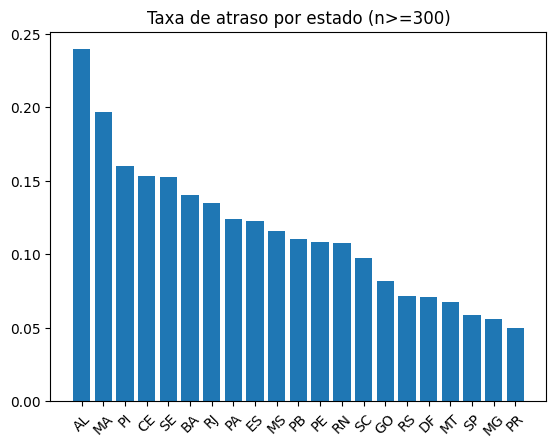

In [ ]:
import matplotlib.pyplot as plt

rate_by_state = (
    base.groupBy("customer_state")
        .agg(F.count("*").alias("n"), F.avg("late").alias("late_rate"))
        .filter("n >= 300")
        .orderBy(F.desc("late_rate"))
)

pdf = rate_by_state.toPandas()

plt.figure()
plt.bar(pdf["customer_state"], pdf["late_rate"])
plt.title("Taxa de atraso por estado (n>=300)")
plt.xticks(rotation=45)
plt.show()

1 = pedido atrasou

0 = pedido não atrasou

**Exercícios**:
* Tarefa 1: Ampliar com um ou mais campos ( distancia real (geo), vendedor, transportadora, categoria do produto, volume de pedidos no periodo) buscando aumentar o valor AUC

* Tarefa 2, com base na apostila fazer uso do mesmo dataset, porém com o objtivo de prever o payment_type usando arvore de decisão